# Récupérer des données issues d'un module Arduino dans un programme Python
L'idée proposée ici est [..]

1013 ms 21.2 °C
3031 ms 21.2 °C
5037 ms 21.2 °C
7042 ms 21.2 °C
9047 ms 21.2 °C
11052 ms 21.2 °C
13059 ms 21.2 °C
15064 ms 21.2 °C
17070 ms 21.2 °C
19075 ms 21.2 °C
21080 ms 21.2 °C
23087 ms 21.3 °C
25092 ms 21.2 °C
27099 ms 21.2 °C
29104 ms 21.2 °C
31110 ms 21.3 °C
33117 ms 21.2 °C
35123 ms 21.3 °C
37129 ms 21.2 °C
39135 ms 21.2 °C
41140 ms 21.2 °C
43147 ms 21.2 °C
45152 ms 21.2 °C
47157 ms 21.3 °C
49163 ms 23.7 °C
51170 ms 24.6 °C
53178 ms 22.9 °C
55184 ms 22.3 °C
57190 ms 22.0 °C
59197 ms 21.8 °C


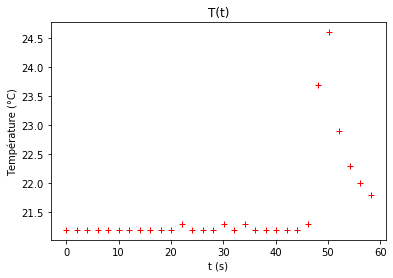

In [2]:
import matplotlib.pyplot as plt # Pour le tracé des graphes
import serial # Pour la liaison avec le module Arduino


# Caractéristiques de l'acquisition
duree=60 # Durée de l'acquisition, en s
intervalle=2000 # Intervalle entre deux mesures, en ms, DOIT être identique dans le programme Arduino
nb_points=int(duree*1000/intervalle) # Estimation du nombre de points nécessaires

# Nom des fichiers de sauvegarde
nomfichier='recuperer_donnees_arduino_temperature'

# Ouverture du port série
#ser=serial.Serial('COM3',9600)
ser=serial.Serial('/dev/ttyACM0',9600)

# Acquisition
liste_t=[] # Création de la liste, vide
liste_T=[] # Création de la liste, vide

while len(liste_T)<nb_points:
    try:
        s=ser.readline().decode('utf8').split(' ') # Lecture de la ligne, décodage puis séparation des deux valeurs
        liste_t.append(int(s[0])) # Remplissage de la liste des temps
        liste_T.append(float(s[1])) # Remplissage de la liste des températures
        print(int(s[0]),'ms',float(s[1]),'°C') # Affichage des valeurs dans la console (pour vérification)
    except:
        pass
    
# Fermeture du port série
ser.close()

# Repositionnement de l'origine des temps à t=0 s, et conversion les valeurs en seconde
orig=liste_t[0] # La première valeur sera à soustraire à toutes les autres

for i in range(len(liste_t)):
    liste_t[i]=(liste_t[i]-orig)/1000

# Sauvegarde des données dans un fichier extérieur (optionnel)
fichier=open(nomfichier+'.csv','w')
fichier.write('t(s)'+';'+'T (°C)'+'\n') # Ecriture de la première ligne

for i in range(len(liste_T)):
    fichier.write(str(liste_t[i]).replace('.',',')+';'+str(liste_T[i]).replace('.',',')+'\n') # Ecriture dans le fichier (on remplace le séparateur décimal au passage)

fichier.close() # Fermeture du fichier de sauvegarde des données

# Représentation graphique des points expérimentaux
plt.figure(1)
plt.plot(liste_t,liste_T,'r+')
plt.xlabel('t (s)')
plt.ylabel('Température (°C)')
plt.title('T(t)')
plt.savefig(nomfichier+'.png') # Sauvegarde de la figure au passage
plt.show()
